In [ ]:
#run this in tf25 or tf26

In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
##Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten,Dense, Dropout


from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
df=pd.read_csv("multi-train-label.csv")

In [4]:
df1=pd.read_csv("multi-test-label.csv")

In [5]:
datagen=ImageDataGenerator(rescale=1./255)
train_generator=datagen.flow_from_dataframe(dataframe=df, directory='data/train', x_col="id", y_col="label", class_mode="categorical", target_size=(150,150))

valid_generator=datagen.flow_from_dataframe(dataframe=df1, directory='data/test', x_col="id", y_col="label", class_mode="categorical", target_size=(150,150))


Found 1050 validated image filenames belonging to 3 classes.
Found 104 validated image filenames belonging to 3 classes.


C:\Users\Silaparasetty.M\Anaconda3\envs\tf26\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [6]:
#conv layers
model = Sequential()
#model.add(Conv2D(64, (3, 3), input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),input_shape = (150,150,3), activation = 'relu'))
 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.2))

model.add(Conv2D(64,(3,3), activation = 'relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.4))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



In [7]:
#fully connected layers
model.add(Flatten())  
 
model.add(Dense( activation = 'relu', units=64))
model.add(Dropout(.2))
model.add(Dense( activation = 'softmax', units=3)) 
 

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        3

In [10]:
model.fit(train_generator,validation_data=valid_generator, epochs=5)

Epoch 1/5
33/33 [==============================] - 61s 2s/step - loss: 1.0960 - accuracy: 0.4152 - val_loss: 0.9260 - val_accuracy: 0.5865
Epoch 2/5
33/33 [==============================] - 53s 2s/step - loss: 0.7472 - accuracy: 0.6495 - val_loss: 0.8235 - val_accuracy: 0.6250
Epoch 3/5
 6/33 [====>.........................] - ETA: 38s - loss: 0.7704 - accuracy: 0.6505

KeyboardInterrupt: 

In [11]:
train_generator.class_indices

{'airplane': 0, 'bike': 1, 'car': 2}

In [23]:
## prediction of single new data
import numpy as np
from tensorflow.keras.preprocessing import image
#test_image= image.load_img('data/inference/car007.jpg',target_size =(150,150))
test_image= image.load_img('data/inference/air.jpg',target_size =(150,150))
#test_image= image.load_img('data/inference/bike.jpg',target_size =(150,150))
#test_image= image.load_img('data/inference/cloud.jpg',target_size =(150,150))

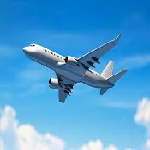

In [24]:
test_image

In [25]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [26]:
test_image.shape

(150, 150, 3)

In [27]:
test_image=test_image.reshape(1,150, 150, 3)

In [28]:
## For single prediction change the dimension using axis. To remove problem of batch
 
result = model.predict(test_image)

In [29]:
np.around(result)

array([[1., 0., 0.]], dtype=float32)

In [30]:
result=result.argmax()

In [31]:
result

0

In [32]:
## Class label of dog and cat

if result == 0:
    prediction = 'airplane'
elif result == 1:
   prediction = 'bike'
else:
    prediction = 'car'
    

In [33]:
prediction

'airplane'